In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set global parameters for plotting.
plt.rc('figure', figsize=(12, 6))
sns.set(font_scale=1.2)
avocado_df = pd.read_csv('avocado2020.csv', 
                         parse_dates=['date'],
                         index_col=['date'])
avocado_df

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
date,,,,,,,,,,,,
2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West


In [10]:
columns_considered = ['average_price', 'type', 'geography']
avocado_df = avocado_df[columns_considered]
avocado_df.head()

,average_price,type,geography
date,,,
2015-01-04,1.22,conventional,Albany
2015-01-04,1.79,organic,Albany
2015-01-04,1.00,conventional,Atlanta
2015-01-04,1.76,organic,Atlanta
2015-01-04,1.08,conventional,Baltimore/Washington


In [11]:
sub_df = avocado_df.query("type == 'conventional'")
# NB: these two variables affect all the following calculations in that kernel.
AVOCADO_TYPE = 'conventional'
GEOGRAPHY = 'Total U.S.'

sub_df = avocado_df.query(f"type == '{AVOCADO_TYPE}' and " \
                          f"geography == '{GEOGRAPHY}'")
                          
sub_df.drop(['type', 'geography'], axis=1, inplace=True)
sub_df

C:\Users\HP\AppData\Local\Temp\ipykernel_29448\3631611805.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(['type', 'geography'], axis=1, inplace=True)


,average_price
date,
2015-01-04,0.95
2015-01-11,1.01
2015-01-18,1.03
2015-01-25,1.04
2015-02-01,0.89
...,...
2020-11-01,0.92
2020-11-08,0.90
2020-11-15,0.91


In [12]:
TEST_SET_SIZE = 45  # number of weeks left for the test set

data = sub_df.values
train_set, test_set = data[:-TEST_SET_SIZE], data[-TEST_SET_SIZE:]

print('shapes:', data.shape, train_set.shape, test_set.shape)

train_set_size = len(data) - TEST_SET_SIZE
train_set_dates = sub_df.head(train_set_size).index  # for plotting
test_set_dates = sub_df.tail(TEST_SET_SIZE).index  

shapes: (306, 1) (261, 1) (45, 1)


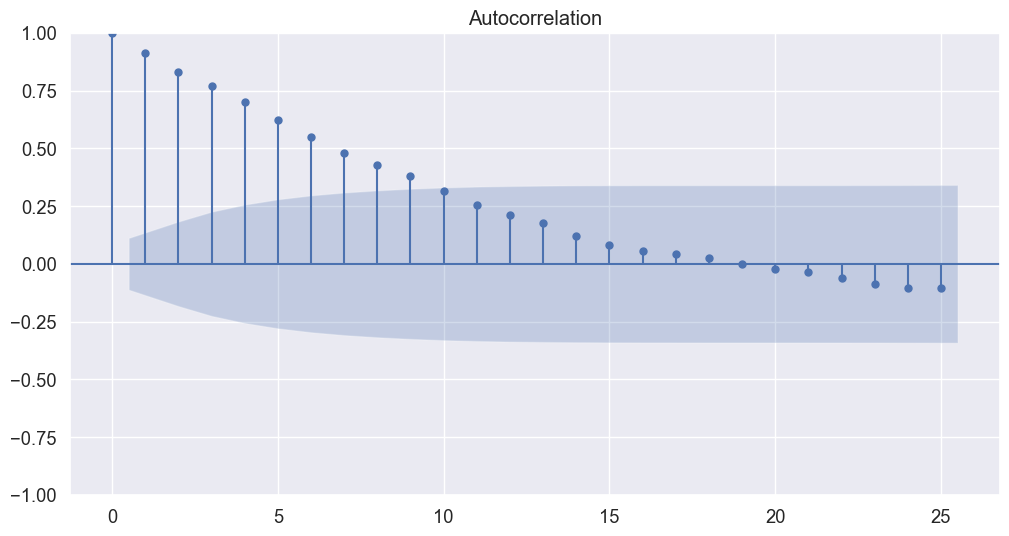

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
data = sub_df
plot_acf(data['average_price'])
# Define the path for saving the file in the Downloads folder
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "acf_plot.png")
# Save the plot as a PNG
plt.savefig(downloads_path, format="png")
plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA
# Extract only the 'average_price' column for a univariate time series
train_set_price = sub_df['average_price']
# Set up the MA model (p=0, d=0, q=10 for an MA(10) model)
ma_model = ARIMA(train_set_price, order=(0, 0, 9))
trained_ma_model = ma_model.fit()

# Print the coefficients
print('Coefficients:', trained_ma_model.params)

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Coefficients: const     1.085475
ma.L1     0.957332
ma.L2     0.835844
ma.L3     0.840027
ma.L4     0.787721
ma.L5     0.677582
ma.L6     0.548933
ma.L7     0.330427
ma.L8     0.196285
ma.L9     0.158411
sigma2    0.004045
dtype: float64


In [19]:
from sklearn.metrics import mean_squared_error as mse

predictions = trained_ma_model.predict(start=train_set_size, 
                                    end=train_set_size + TEST_SET_SIZE - 1)

error = mse(test_set, predictions)

print(f'test MSE: {error:.3}')
print(f'test RMSE: {error ** 0.5:.3}')

test MSE: 0.00223
test RMSE: 0.0473


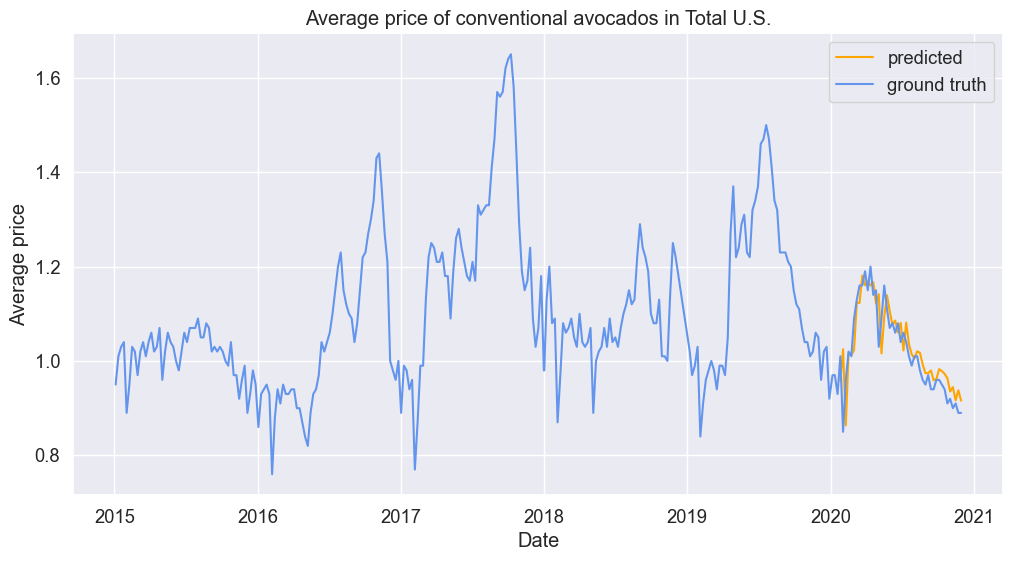

In [20]:
plt.plot(test_set_dates, predictions, color='orange', label='predicted')
plt.plot(sub_df.index, sub_df.average_price, color='cornflowerblue', label='ground truth')
plt.legend(loc='best')
plt.title(f'Average price of {AVOCADO_TYPE} avocados in {GEOGRAPHY}')
plt.xlabel('Date')
plt.ylabel('Average price')
# Define the path for saving the file in the Downloads folder
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "ma_plot_forecast.png")

# Save the plot as a PNG
plt.savefig(downloads_path, format="png")
plt.show()